In [4]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu117
     ---------------------------------------- 2.5/2.5 MB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [6]:
!cd yolov5 & pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# load model directory, type (small)

In [26]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Kaushik/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-7-3 Python-3.9.13 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


# to see inside=== model

In [11]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# Make Detections with Images

In [19]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [20]:
results = model(img)
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,742.974792,48.395599,1141.844604,720.000000,0.881052,0,person
1,442.007629,437.522430,496.653992,709.973511,0.675214,27,tie
2,123.024200,193.287292,715.662231,719.723877,0.665812,0,person
3,982.803162,308.417358,1027.365845,419.987000,0.260076,27,tie


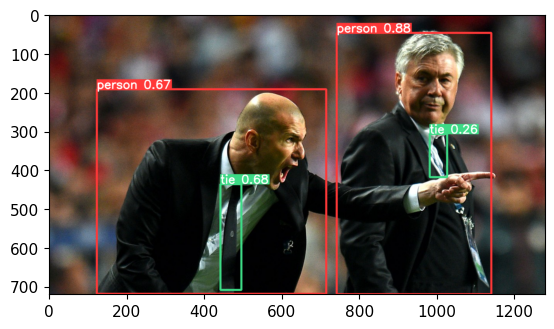

In [21]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [22]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [23]:
results = model(img)
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,597.738037,409.955261,753.843994,523.303528,0.912989,2,car
1,469.551971,261.518219,570.306519,339.519348,0.904086,2,car
2,289.587433,331.023743,401.410034,429.064972,0.887308,2,car
3,605.160950,118.189735,704.458740,227.466431,0.881370,7,truck
4,343.118927,456.423309,478.527802,531.599915,0.863870,2,car
5,67.397072,324.258240,173.438034,413.522522,0.839453,2,car
6,37.704380,471.960114,186.330261,530.608398,0.832936,2,car
7,500.519287,129.382706,569.468933,175.960785,0.801522,2,car
8,111.122108,263.190369,196.919617,339.051178,0.771318,2,car
9,684.315002,109.961769,748.429688,152.496582,0.762707,2,car


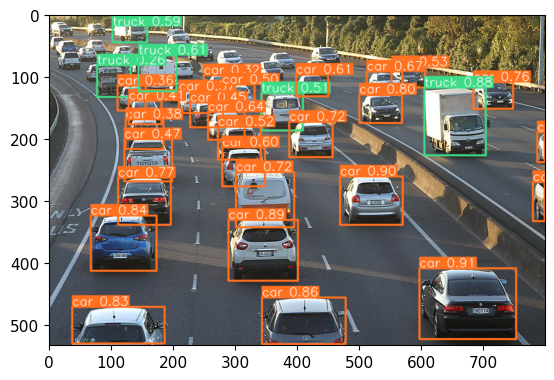

In [24]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# Real Time Detections

In [13]:
cap= cv2.VideoCapture(0) #jst to open the camera #'street.mp4'
while cap.isOpened():
    ret, frame= cap.read()  #return value and the frame image
    results= model(frame)  #yolo model, pass through the frame(webcam)
    
    #jst show name YOLO/top anything #results.render() jst return np array(img)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF== ord('q'):    #exit
        break
cap.release()              #close camera
cv2.destroyAllWindows()    #close the popup

#  Sleep detect Trainning from scratch

In [27]:
import uuid #unique identifier
import os   #to work with file path
import time #for a break btwn img capture

In [10]:
IMAGES_PATH= os.path.join('data', 'images') #folder data->img
labels= ['awake', 'sleep']
number_img = 20

In [14]:
cap= cv2.VideoCapture(0)
#loop for labels
for label in labels:
    #collecting img for awake // sleep
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    #loop for imgs
    for img_num in range(number_img):
        print('collecting imgs for {}, img no. {}'.format(label, img_num))
        
        ret, frame= cap.read()  #webcam feed(frame)
        
        #data\images\awake.2342342fdfwsdadweer32q.jpg #maming of imgs
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        cv2.imwrite(imgname,frame) #write img to file
        
        cv2.imshow('Image collec', frame) #show the img
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

collecting imgs for awake, img no. 0
collecting imgs for awake, img no. 1
collecting imgs for awake, img no. 2
collecting imgs for awake, img no. 3
collecting imgs for awake, img no. 4
collecting imgs for awake, img no. 5
collecting imgs for awake, img no. 6
collecting imgs for awake, img no. 7
collecting imgs for awake, img no. 8
collecting imgs for awake, img no. 9
collecting imgs for awake, img no. 10
collecting imgs for awake, img no. 11
collecting imgs for awake, img no. 12
collecting imgs for awake, img no. 13
collecting imgs for awake, img no. 14
collecting imgs for awake, img no. 15
collecting imgs for awake, img no. 16
collecting imgs for awake, img no. 17
collecting imgs for awake, img no. 18
collecting imgs for awake, img no. 19
collecting imgs for sleep, img no. 0
collecting imgs for sleep, img no. 1
collecting imgs for sleep, img no. 2
collecting imgs for sleep, img no. 3
collecting imgs for sleep, img no. 4
collecting imgs for sleep, img no. 5
collecting imgs for sleep, i

In [15]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [21]:
# in the website only
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt

^C


In [28]:
#forcereload if we can't find last file #custom coz this type full dataset nt only yolov5
model= torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/last.pt', force_reload= True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Kaushik/.cache\torch\hub\master.zip
YOLOv5  2023-7-3 Python-3.9.13 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [33]:
#checking the img
img= os.path.join('data', 'images', 'awake.6c832256-195f-11ee-b15c-38f3ab758a4b.jpg')

In [34]:
results= model(img)
results.print()

image 1/1: 480x640 1 awake
Speed: 15.6ms pre-process, 342.1ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


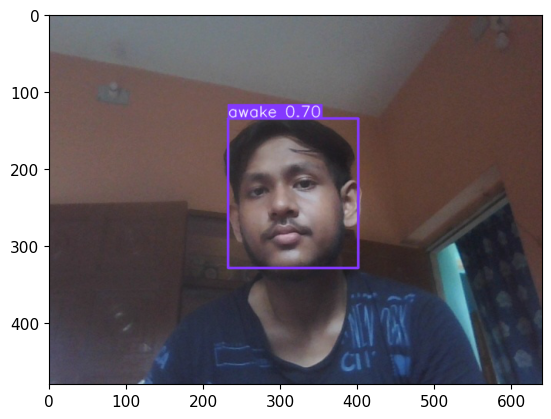

In [35]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [36]:
cap= cv2.VideoCapture(0) #jst to open the camera #'street.mp4'
while cap.isOpened():
    ret, frame= cap.read()  #return value and the frame image
    results= model(frame)  #yolo model, pass through the frame(webcam)
    
    #jst show name YOLO/top anything #results.render() jst return np array(img)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF== ord('q'):    #exit
        break
cap.release()              #close camera
cv2.destroyAllWindows()    #close the popup